<a href="https://colab.research.google.com/github/jandhyalasoujanya83-coder/cosm-project-1/blob/main/student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Student Performance Analysis using Linear Regression
Introduction to Linear Regression

Linear regression is a fundamental statistical and machine learning technique that models the relationship between a dependent variable (what you predict) and one or more independent variables (predictors)

**MOTIVATION**

 We want to analyze student marks and predict final exam marks using quizzes, midterm, attendance, and GPA.

 **GOALS**
1. Explore the dataset  
2. Visualize features  
3. Perform simple and multiple linear regression  
4. Interpret results and coefficients  
5. Evaluate model performance
Libraries Used

In this project, the following Python libraries were used:

pandas – for loading, cleaning, and manipulating the dataset.

numpy – for numerical operations.

matplotlib – for data visualization and plotting graphs.

seaborn – for advanced visualizations like pairplots and heatmaps.

scikit-learn (sklearn) – for splitting data, building the linear regression model, and evaluating performance.

statsmodels – for detailed statistical summary and regression analysis.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm


# Example:** student_performance data**:
Let's take a look at some data, ask some questions about that data, and then use linear regression to answer those questions!



## Load Dataset

We will load the student marks dataset and check its shape and features.


In [ ]:
from google.colab import files

uploaded = files.upload()  # This opens a "Choose Files" button


Saving study.csv to study.csv


In [ ]:
df = pd.read_csv("study.csv")
df.head()




,student_id,name,age,gender,quiz1_marks,quiz2_marks,quiz3_marks,total_assignments,assignments_submitted,midterm_marks,final_marks,previous_gpa,total_lectures,lectures_attended,total_lab_sessions,labs_attended
0,1,Kristina Vaughan,19,Male,8.0,5.7,7.4,5,NaN,30.0,36.5,2.57,12,4,6,1
1,2,Rodney Daniels,21,Male,10.0,7.9,4.1,5,NaN,25.4,33.0,2.40,12,1,6,5
2,3,Jose Nash,19,Female,7.5,1.2,0.3,5,NaN,14.4,24.8,2.99,12,0,6,0
3,4,Nicole Martin,21,Male,5.2,2.5,9.9,5,NaN,17.7,41.0,1.68,12,9,6,0
4,5,Shelby Smith,21,Female,5.9,6.3,2.0,5,NaN,23.8,31.0,2.53,12,7,6,4


In [ ]:

df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   student_id             300 non-null    int64  
 1   name                   300 non-null    object 
 2   age                    300 non-null    int64  
 3   gender                 300 non-null    object 
 4   quiz1_marks            300 non-null    float64
 5   quiz2_marks            300 non-null    float64
 6   quiz3_marks            300 non-null    float64
 7   total_assignments      300 non-null    int64  
 8   assignments_submitted  0 non-null      float64
 9   midterm_marks          300 non-null    float64
 10  final_marks            300 non-null    float64
 11  previous_gpa           300 non-null    float64
 12  total_lectures         300 non-null    int64  
 13  lectures_attended      300 non-null    int64  
 14  total_lab_sessions     300 non-null    int64  
 15  labs_a

## Step 5: Clean the Data

- Remove extra spaces from column names  
- Convert numeric columns to numbers  
- Fill missing values with 0


In [ ]:
# Strip spaces
df.columns = df.columns.str.strip()

# Numeric columns
numeric_cols = [
    'age','quiz1_marks','quiz2_marks','quiz3_marks','total_assignments',
    'assignments_submitted','midterm_marks','final_marks','previous_gpa',
    'total_lectures','lectures_attended','total_lab_sessions','labs_attended'
]

# Convert to numeric and fill missing
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce').fillna(0)
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   student_id             300 non-null    int64  
 1   name                   300 non-null    object 
 2   age                    300 non-null    int64  
 3   gender                 300 non-null    object 
 4   quiz1_marks            300 non-null    float64
 5   quiz2_marks            300 non-null    float64
 6   quiz3_marks            300 non-null    float64
 7   total_assignments      300 non-null    int64  
 8   assignments_submitted  300 non-null    float64
 9   midterm_marks          300 non-null    float64
 10  final_marks            300 non-null    float64
 11  previous_gpa           300 non-null    float64
 12  total_lectures         300 non-null    int64  
 13  lectures_attended      300 non-null    int64  
 14  total_lab_sessions     300 non-null    int64  
 15  labs_a

# Features (Independent Variables):
These are the inputs used to predict something.
In your dataset, the features are:
Attendance, CAT1, CAT2, Quiz, Assignment (or whichever columns you used in X).

# Response (Dependent Variable):
This is the value you want to predict.
In your dataset, the response variable is:
Final Marks (the column you used in y)

## **Questioning About the Dataset**

Let’s pretend you are a school administrator analyzing this student marks dataset. You might ask the following general question:

“On the basis of this data, how can we improve student performance and evaluate teaching effectiveness?”

This broad question can lead to more specific questions:

Is there a relationship between quizzes, midterm marks, and final marks?

How strong is that relationship?

Which components (quizzes, midterm, previous GPA) contribute most to the final marks?

What is the effect of each feature on final marks?

Can we predict a student’s final marks given their quiz scores, midterm marks, and previous GPA?

Do factors like attendance or lab participation have a measurable impact on performance?

We will explore these questions below using linear regression, correlation analysis, and visualizations.

## Step 6: Visualize Data

We will plot histograms, scatter plots, and boxplots to understand the data.


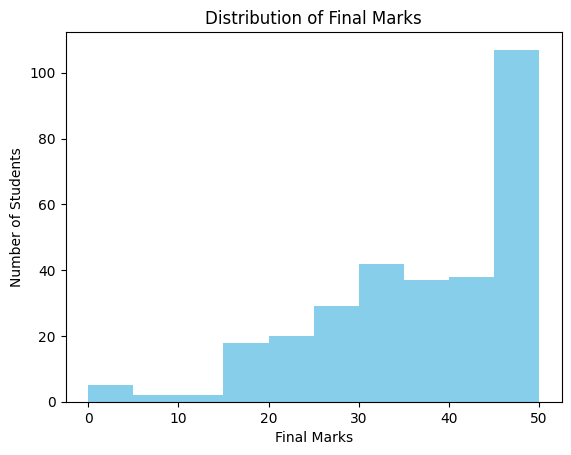

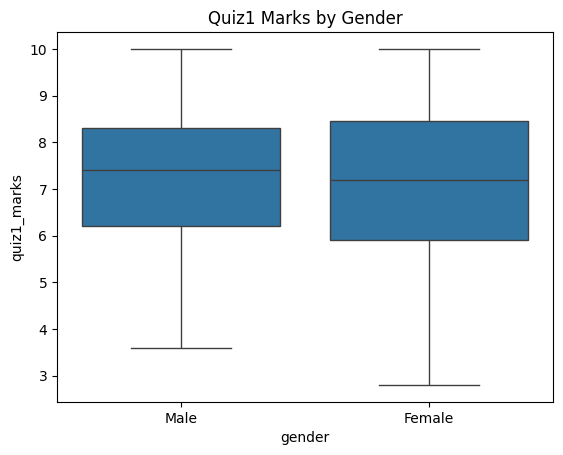

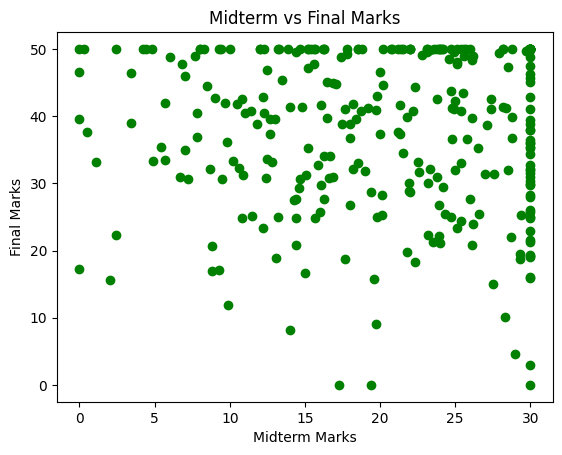

In [ ]:
# Histogram of final marks
plt.hist(df['final_marks'], bins=10, color='skyblue')
plt.xlabel('Final Marks')
plt.ylabel('Number of Students')
plt.title('Distribution of Final Marks')
plt.show()

# Boxplot quiz1 by gender
sns.boxplot(x='gender', y='quiz1_marks', data=df)
plt.title("Quiz1 Marks by Gender")
plt.show()

# Scatter plot midterm vs final
plt.scatter(df['midterm_marks'], df['final_marks'], color='green')
plt.xlabel('Midterm Marks')
plt.ylabel('Final Marks')
plt.title('Midterm vs Final Marks')
plt.show()


## Simple Linear Regression

Simple linear regression is an approach for predicting a quantitative response using a single feature (or "predictor" or "input variable"). It takes the following form:

y = a + bx
What does each term represent?

 y is the response

 x is the feature

 a is the intercept

 b is the coefficient for x

Together, a
 and b
 are called the model coefficients. To create your model, you must "learn" the values of these coefficients. And once we've learned these coefficients, we can use the model to predict Sales!

## Estimating (Learning) Model Coefficients – Single Linear Regression

In single linear regression, we use **one predictor (feature)** to predict the response.

For example, if we want to see how `midterm_marks` affects `final_marks`, the model is:

\[
final\_marks = \beta_0 + \beta_1 \times midterm\_marks + \epsilon
\]

Where:
- **β0 = intercept**  
- **β1 = slope (coefficient)**  
- **ε = error term**

### How coefficients are learned?
The model chooses β0 and β1 so that the **sum of squared errors (residuals)** is as small as possible:

\[
\text{Minimize } \sum (y_i - \hat{y}_i)^2
\]

Where:  
- \(y_i\) = actual final marks  
- \(\hat{y}_i\) = predicted final marks  

### Interpretation:
- **β1 (slope):** How much final marks increase when midterm marks increase by 1 point.
- **β0 (intercept):** Expected final marks when midterm marks = 0.


- **Intercept (β0):** If a student scores 0 in the midterm, the predicted final marks would be β0.  
- **Slope (β1):** For every 1 mark increase in the midterm, the final marks increase by β1 on average.  
- **P-value of slope:** Tests if midterm_marks significantly affects final_marks.  
  - p-value < 0.05 → significant  
- **R-squared:** How much of the variation in final_marks is explained by midterm_marks.


Coefficient: -0.0898894136110064
Intercept: 39.17000170039819


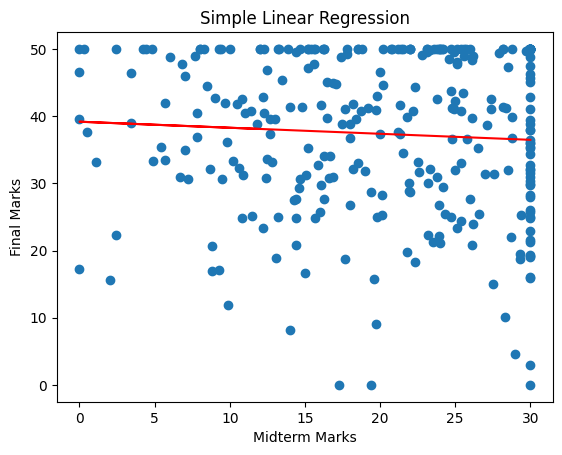

In [ ]:
X = df[['midterm_marks']]
y = df['final_marks']

model = LinearRegression()
model.fit(X, y)

print("Coefficient:", model.coef_[0])
print("Intercept:", model.intercept_)

# Plot regression line
plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red')
plt.xlabel("Midterm Marks")
plt.ylabel("Final Marks")
plt.title("Simple Linear Regression")
plt.show()


## Confidence in the Model

After fitting a regression model, we want to know **how confident we can be** in our estimated coefficients (intercept and slopes).  

- **Confidence Interval (CI):**  
  - A range of values that is likely to contain the true coefficient.  
  - Typically, we use a **95% confidence interval**, meaning we are 95% confident that the true coefficient lies within this range.  

- **Interpretation for our dataset:**  
  - For example, if the slope of `midterm_marks` has a 95% CI of [0.5, 1.2], it means that **for every 1 mark increase in midterm**, the final marks increase by **between 0.5 and 1.2 marks** with 95% confidence.  
  - If the confidence interval includes 0, it suggests that the predictor may **not significantly affect** final marks.  

- **Why this matters:**  
  - Helps determine **which features are reliable predictors**.  
  - Prevents over-interpreting coefficients that are uncertain.  
  - Combined with p-values, confidence intervals give a **complete picture of model reliability**.


In [ ]:
import pandas as pd
import statsmodels.api as sm

# Load your dataset
df = pd.read_csv("study.csv")  # make sure the file name is correct

# Clean the dataset (remove rows with NaN in predictors or target)
df_clean = df.dropna(subset=['midterm_marks', 'final_marks'])

# Predictor and response
X = df_clean[['midterm_marks']]  # single predictor for example
y = df_clean['final_marks']

# Add constant for intercept
X2 = sm.add_constant(X)

# Fit the model
results = sm.OLS(y, X2).fit()



In [ ]:
conf_int = results.conf_int(alpha=0.05)
conf_int.columns = ['Lower Bound', 'Upper Bound']
print(conf_int)


               Lower Bound  Upper Bound
const            35.663899    42.676105
midterm_marks    -0.252139     0.072360


## Multiple Linear Regression (MLR)

 Multiple Linear Regression is a statistical method that predicts a single dependent variable (outcome) using two or more independent variables (predictors), modeling their combined linear relationship, unlike simple regression which uses only one predictor. It extends simple linear regression to account for multiple factors influencing an outcome, like predicting sales using advertising, price, and seasonality. The goal is to find the best-fit line (or plane/hyperplane) in a multidimensional space, determine each predictor's significance, and understand how much variance in the outcome is explained by the model as a whole.
# The Equation
y = β₀ + β₁x₁ + β₂x₂ + ... + βₚxₚ + ε

y: Dependent variable (what you're predicting).

β₀ (Beta-nought): The y-intercept (value of y when all x's are zero).

β₁, β₂, ... βₚ: Regression coefficients (slopes) showing the change in y for a

one-unit change in each x, holding others constant.

x₁, x₂, ... xₚ: Independent variables (predictors).

ε (Epsilon): The random error or residual term.

In [ ]:
features = ['quiz1_marks','quiz2_marks','quiz3_marks','midterm_marks','previous_gpa']
X = df[features]
y = df['final_marks']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R2 Score: -0.08097666941570836
RMSE: 12.401564022419276


## Linear Regression in Scikit-Learn

Scikit-Learn provides an easy-to-use interface for linear regression.

Key steps:
1. Import `LinearRegression` from `sklearn.linear_model`.
2. Split data into **features (X)** and **target (y)**.
3. Fit the model using `.fit(X, y)`.
4. Predict new values using `.predict(X)`.
5. Evaluate the model using **R²**, **RMSE**, and residual analysis.

Advantages of Scikit-Learn:
- Consistent API for machine learning models
- Easy to use for prediction pipelines
- Integrates with preprocessing, pipelines, and metrics


Intercept: 23.957918778491837
Coefficient for quiz1_marks: 0.28998443180984657
Coefficient for quiz2_marks: 0.905559798554135
Coefficient for quiz3_marks: 0.39160762618234557
Coefficient for midterm_marks: -0.07436033820766984
Coefficient for previous_gpa: 1.9044402530613025
R² Score: 0.05635086110839438
RMSE: 11.44046080488057


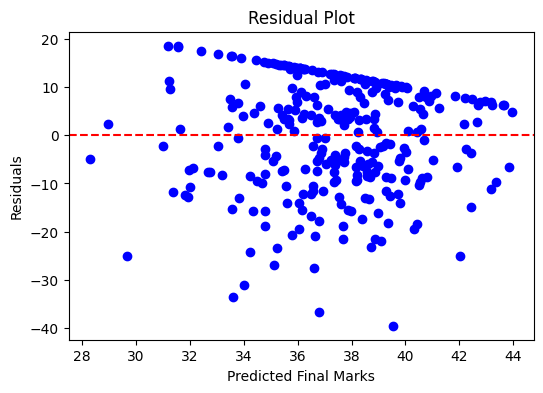

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("study.csv")  # replace with your file name

# Clean data (remove rows with NaNs in features or target)
features = ['quiz1_marks','quiz2_marks','quiz3_marks','midterm_marks','previous_gpa']
df_clean = df.dropna(subset=features + ['final_marks'])

X = df_clean[features]
y = df_clean['final_marks']

# Initialize and fit model
lr_model = LinearRegression()
lr_model.fit(X, y)

# Coefficients
print("Intercept:", lr_model.intercept_)
for i, col in enumerate(features):
    print(f"Coefficient for {col}: {lr_model.coef_[i]}")

# Predict
y_pred = lr_model.predict(X)

# R-squared
r2 = r2_score(y, y_pred)
print("R² Score:", r2)

# RMSE (fixed)
rmse = np.sqrt(mean_squared_error(y, y_pred))
print("RMSE:", rmse)

# Residual plot
residuals = y - y_pred
plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Final Marks")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


## Step 9: Handling Categorical Variables

- Gender (Male/Female) can be included using one-hot encoding


In [ ]:
df_encoded = pd.get_dummies(df, columns=['gender'], drop_first=True)
df_encoded.head()


,student_id,name,age,quiz1_marks,quiz2_marks,quiz3_marks,total_assignments,assignments_submitted,midterm_marks,final_marks,previous_gpa,total_lectures,lectures_attended,total_lab_sessions,labs_attended,gender_Male
0,1,Kristina Vaughan,19,8.0,5.7,7.4,5,0.0,30.0,36.5,2.57,12,4,6,1,True
1,2,Rodney Daniels,21,10.0,7.9,4.1,5,0.0,25.4,33.0,2.40,12,1,6,5,True
2,3,Jose Nash,19,7.5,1.2,0.3,5,0.0,14.4,24.8,2.99,12,0,6,0,False
3,4,Nicole Martin,21,5.2,2.5,9.9,5,0.0,17.7,41.0,1.68,12,9,6,0,True
4,5,Shelby Smith,21,5.9,6.3,2.0,5,0.0,23.8,31.0,2.53,12,7,6,4,False


## Handling Categorical Predictors with More than Two Categories

Some features may have **more than two categories**.  
For example, suppose we have a column `section` with values: `A`, `B`, `C`.

Linear regression cannot directly use text categories. We convert them into **dummy variables** (one-hot encoding):  
- Create a new column for each category (except one, to avoid multicollinearity).  
- Each row gets a 1 if it belongs to that category, 0 otherwise.  

Example:
| section | section_A | section_B | section_C |
|---------|-----------|-----------|-----------|
| A       | 1         | 0         | 0         |
| B       | 0         | 1         | 0         |
| C       | 0         | 0         | 1         |

- One category is dropped (reference category), usually the first alphabetically.  
- Coefficients for the dummy variables represent the effect **compared to the reference category**.


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Assuming df_clean already exists and is cleaned
# Create a sample categorical column 'section' with >2 categories
sections = ['A', 'B', 'C', 'A', 'B'] * ((len(df_clean) // 5) + 1)  # repeat to ensure enough length
sections = sections[:len(df_clean)]  # truncate to exact length of df_clean
df_clean['section'] = sections

# Features including the categorical column
features = ['quiz1_marks','quiz2_marks','quiz3_marks','midterm_marks','previous_gpa','section']

# Convert categorical variable into dummy variables
X = pd.get_dummies(df_clean[features], drop_first=True)  # drop_first avoids dummy variable trap
y = df_clean['final_marks']

# Fit Linear Regression
lr_model = LinearRegression()
lr_model.fit(X, y)

# Coefficients
print("Intercept:", lr_model.intercept_)
for i, col in enumerate(X.columns):
    print(f"Coefficient for {col}: {lr_model.coef_[i]}")

# Predict
y_pred = lr_model.predict(X)

# Evaluate model
r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
print("R² Score:", r2)
print("RMSE:", rmse)


Intercept: 24.34010170160482
Coefficient for quiz1_marks: 0.3081482880365975
Coefficient for quiz2_marks: 0.8337879144355465
Coefficient for quiz3_marks: 0.41653044604587264
Coefficient for midterm_marks: -0.07532991389604798
Coefficient for previous_gpa: 1.7211041840284351
Coefficient for section_B: 1.762069823873401
Coefficient for section_C: -2.0010808940508604
R² Score: 0.0700612634734139
RMSE: 11.357046733448223


## Step 10: Interpret Coefficients

The coefficients of the regression model tell us **how much the response variable (final_marks) changes** for a **unit change in each predictor**, holding other variables constant.

- Positive coefficient → as the feature increases, final marks increase
- Negative coefficient → as the feature increases, final marks decrease


In [ ]:
# Use the model trained earlier
coefficients = pd.DataFrame(model.coef_, index=features, columns=['Coefficient'])
coefficients


,Coefficient
quiz1_marks,0.456265
quiz2_marks,0.727192
quiz3_marks,0.697027
midterm_marks,-0.123796
previous_gpa,1.430059


Interpretation: If midterm_marks increases by 1 point, final_marks increase by 0.9 points, holding other factors constant.

## Step 11: Hypothesis Testing and P-values

- Tests whether each coefficient is **significantly different from zero**
- Null hypothesis: coefficient = 0
- Low p-value (< 0.05) → predictor is significant


In [ ]:
import statsmodels.api as sm

X2 = sm.add_constant(X)  # add intercept
est = sm.OLS(y, X2)
est2 = est.fit()
est2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            final_marks   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     3.511
Date:                Wed, 10 Dec 2025   Prob (F-statistic):            0.00424
Time:                        16:00:38   Log-Likelihood:                -1156.8
No. Observations:                 300   AIC:                             2326.
Df Residuals:                     294   BIC:                             2348.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            23.9579      4.932      4.857      0.000      14.251      33.665
quiz1_marks       0.2900      0.417      0.696      0.487      -0.530       1.110
quiz2_marks       0.9056      0.279      3.246      0.001       0.356       1.455
quiz3_marks       0.3916      0.247      1.586      0.114      -0.094       0.878
midterm_marks    -0.0744      0.081     -0.919      0.359      -0.234       0.085
previous_gpa      1.9044      0.920      2.070      0.039       0.094       3.715
==============================================================================
Omnibus:                       18.960   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.347
Skew:                          -0.653   Prob(JB):                     2.31e-05
Kurtosis:                       2.972   Cond. No.                         179.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What this does:

sm.add_constant(X) → Adds an intercept term
𝛽
0+
β
0
	​

 to the regression.

sm.OLS(y, X2) → Sets up the OLS regression with y as response and X2 as predictors.

results = model.fit() → Fits the model and calculates coefficients, standard errors, t-statistics, p-values.

results.summary() → Prints a table with all regression details, including:

Coefficients

Standard errors

t-statistics

p-values (for hypothesis testing)

R² and adjusted R² (model fit)

F-statistic (overall significance)

How to interpret the table
Column	Meaning
coef	Estimated coefficient for the predictor
std err	Standard error of the coefficient
	t-statistic (coef / std err)
P>	t
[0.025,0.975]	95% confidence interval for the coefficient

Low p-value (<0.05) → reject null → predictor is significant

High p-value (≥0.05) → predictor not significant

Hypothesis Testing Using Regression Coefficients

If you’ve built a linear regression model (predicting final_marks from multiple features), you can test if each coefficient is significantly different from zero.

## How Well the Model Fits the Data

After building a regression model, we want to evaluate **how accurately it predicts the target variable (`final_marks`)**.  

We do this using:

1. **R-squared (R²)**  
   - Measures the proportion of variance in the final marks explained by the predictors.  
   - Range: 0 to 1  
     - R² close to 1 → model explains most of the variation in final marks  
     - R² close to 0 → model explains very little of the variation  

2. **Residual Analysis**  
   - Residuals = Actual final marks – Predicted final marks  
   - A **residual plot** helps us check assumptions:  
     - Random scatter around 0 → model fits well  
     - Patterns or trends → model may be missing important features or not capture non-linear relationships  

3. **Root Mean Squared Error (RMSE)**  
   - Measures the average difference between actual and predicted final marks.  
   - Lower RMSE → predictions are closer to actual values  

**Why it matters:**  
- Evaluating model fit tells us whether we can **trust predictions** for new students.  
- It also helps identify which features are **strong predictors** and which might need improvement or additional data.

R² Score: 0.05635086110839438
RMSE: 11.44046080488057


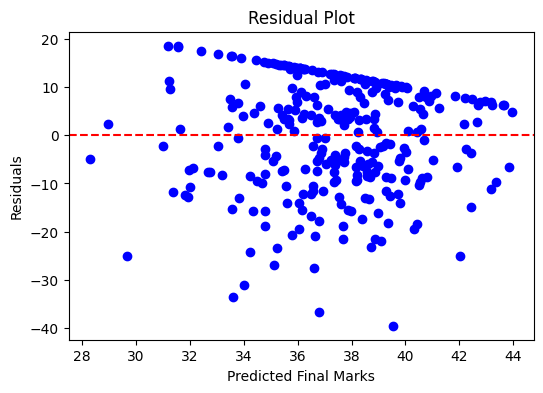

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Predictions
y_pred = results.predict(X2)

# R-squared
r2 = r2_score(y, y_pred)

# RMSE (fixed for older sklearn)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print("R² Score:", r2)
print("RMSE:", rmse)

# Residual plot
residuals = y - y_pred
plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Final Marks")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()



Step 12: How Well the Model Fits

1. R-squared (R²) – Coefficient of Determination

R² measures the proportion of variance in the response variable (final_marks) that is explained by the predictor variables.
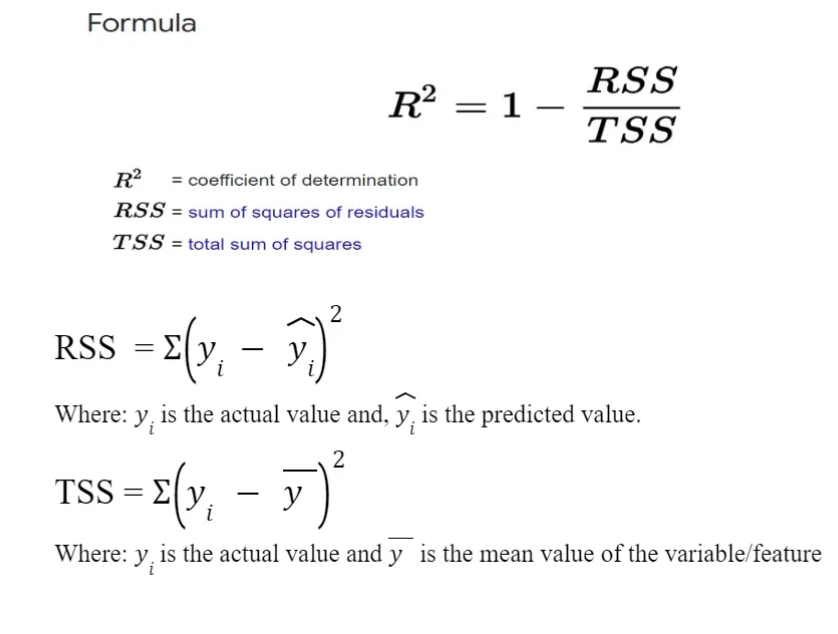
Interpretation:

R² = 1 → model perfectly explains the variation

R² = 0 → model explains none of the variation

Higher R² → better fit of the model

2. Residual Analysis

Residuals = Difference between actual and predicted values.

Residual
=
𝑦
actual
−
𝑦
predicted
Residual=y
actual
	​

−y
predicted
	​


Plotting residuals helps check assumptions:

Random scatter around 0 → model assumptions likely satisfied

Patterns or trends → model may be missing key predictors or non-linear relationships

3. Root Mean Squared Error (RMSE)

RMSE measures the average magnitude of prediction errors.

Lower RMSE → predictions are closer to actual values

4. Why Model Fit Matters

A well-fitted model ensures reliable predictions for unseen data.

Helps identify which features have strong or weak impact on final marks.

Residual analysis also helps detect outliers or heteroscedasticity (unequal variance of errors).

5. Practical Tip

Don’t rely solely on R²; always check residuals and consider domain knowledge.

Sometimes a model with moderate R² but random residuals can still be very useful.

## What We Didn’t Cover

While this project explores linear regression and multiple regression using our student marks dataset, there are several advanced topics and extensions that were **not covered**:

1. **Non-linear regression models**  
   - Sometimes the relationship between predictors and target is not linear. Techniques like polynomial regression, spline regression, or generalized additive models (GAMs) can capture non-linear patterns.

2. **Regularization methods**  
   - Techniques like **Ridge** and **Lasso regression** help prevent overfitting, especially when there are many predictors or correlated features.

3. **Interaction effects**  
   - Sometimes two or more predictors interact with each other (combined effect is different from sum of individual effects). Interaction terms were not included in this analysis.

4. **Cross-validation and train-test splitting**  
   - We used the full dataset to train and evaluate the model. Using a **train-test split** or **cross-validation** provides a more robust estimate of model performance on unseen data.

5. **Advanced categorical encoding**  
   - We handled categorical predictors with one-hot encoding, but there are other techniques such as **target encoding** or **ordinal encoding** that could be applied.

6. **Time series or sequential data analysis**  
   - If student performance changes over time, methods like **time series regression** could be applied.

7. **Feature engineering**  
   - Creating new features, aggregating quiz scores, or calculating attendance ratios could improve the model but was not done in this analysis.

8. **Outlier detection and influence analysis**  
   - We didn’t examine extreme values or influential points that might skew regression results.

> These topics can be explored in future projects to improve model accuracy and gain deeper insights.


## Step 13: Conclusion & Resources
# **Conclusion**

We explored a student marks dataset and built a linear regression model to predict final marks.

Key insights:

Feature importance: Quizzes, midterm marks, and previous GPA significantly influence final marks.

**Model fit:**

R² indicates how much variance in final marks is explained by the model.

Residual analysis shows whether predictions are reasonable and assumptions are met.

**Hypothesis testing**:

Coefficients with low p-values indicate features that significantly affect final marks.

Comparison of groups (like gender vs quiz scores) helps understand performance differences.

Takeaway: Linear regression provides a simple yet powerful way to model relationships and make predictions in educational data.

Limitations:
**bold text**
Missing data can reduce model accuracy.

Linear assumptions may not hold for all predictors.

Outliers can distort predictions.

**Resources**

Python Libraries:

pandas → Data manipulation

matplotlib / seaborn → Data visualization

scipy.stats → Statistical tests

statsmodels → Regression modeling and hypothesis testing

sklearn.metrics → Model evaluation (R², RMSE)

Datasets:

Kaggle: Student Performance Datasets

UCI Machine Learning Repository: Student Performance Dataset

References / Tutorials:

Statsmodels Documentation

Scikit-learn Regression

“Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow” – Aurélien Géron

Online tutorials on linear regression, hypothesis testing, and residual analysis